In [57]:
import sklearn
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [58]:
games = pd.read_csv('./games.csv', ';')
#print(games.head(5))
games.info()

/home/diegoflm/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50286 entries, 0 to 50285
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        50286 non-null  int64
 1   firstBlood          50286 non-null  int64
 2   firstTower          50286 non-null  int64
 3   firstInhibitor      50286 non-null  int64
 4   firstBaron          50286 non-null  int64
 5   firstDragon         50286 non-null  int64
 6   firstRiftHerald     50286 non-null  int64
 7   t1_towerKills       50286 non-null  int64
 8   t1_inhibitorKills   50286 non-null  int64
 9   t1_baronKills       50286 non-null  int64
 10  t1_dragonKills      50286 non-null  int64
 11  t1_riftHeraldKills  50286 non-null  int64
 12  t2_towerKills       50286 non-null  int64
 13  t2_inhibitorKills   50286 non-null  int64
 14  t2_baronKills       50286 non-null  int64
 15  t2_dragonKills      50286 non-null  int64
 16  t2_riftHeraldKills  50286 non-null  int6

In [59]:
# Cuantitative variables (integer)
games.select_dtypes(include=['int64']).describe()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
count,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000,50286.000000
mean,1871.386032,1.487233,1.485125,1.339578,0.948693,1.477270,0.749195,5.835163,1.041781,0.381200,1.420356,0.257487,5.681999,1.008611,0.424472,1.437975,0.245854,1.493776
std,450.876052,0.499842,0.500499,0.652960,0.838988,0.530346,0.824393,3.740575,1.269064,0.588001,1.201740,0.437254,3.809336,1.261867,0.617672,1.219412,0.430597,0.499966
min,610.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1554.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1846.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2156.750000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000,2.000000
max,4728.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000,2.000000


# Split training data from test data: 80% for training, 20% for testing.

In [60]:
from sklearn.model_selection import train_test_split
N=len(games)
cTrain=int(N*0.8) # 80% para entrenar y 20% para probar
cTest=N-cTrain
print(N,cTrain,cTest)
train_data,test_data= sklearn.model_selection.train_test_split(games, train_size=cTrain, test_size=cTest)

50286 40228 10058


In [61]:
#train_data.shape
#train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40228 entries, 18048 to 41028
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        40228 non-null  int64
 1   firstBlood          40228 non-null  int64
 2   firstTower          40228 non-null  int64
 3   firstInhibitor      40228 non-null  int64
 4   firstBaron          40228 non-null  int64
 5   firstDragon         40228 non-null  int64
 6   firstRiftHerald     40228 non-null  int64
 7   t1_towerKills       40228 non-null  int64
 8   t1_inhibitorKills   40228 non-null  int64
 9   t1_baronKills       40228 non-null  int64
 10  t1_dragonKills      40228 non-null  int64
 11  t1_riftHeraldKills  40228 non-null  int64
 12  t2_towerKills       40228 non-null  int64
 13  t2_inhibitorKills   40228 non-null  int64
 14  t2_baronKills       40228 non-null  int64
 15  t2_dragonKills      40228 non-null  int64
 16  t2_riftHeraldKills  40228 non-null  

# Pipeline for categorical attributes

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [63]:
#6 categorical attributes, where the numeric values don't have a numerical meaning.
cat_atts = ['firstBlood','firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False))
    ])

# Pipeline for numeric attributes

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

It was found that the attribute 'gameDuration' is not relevant for the model,  
and leaving it out of the num_atts slightly improves the accuracy. 

In [65]:
#10 numeric attributes
#num_atts = ['gameDuration', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 
num_atts =                ['t1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 
        't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 
        't2_riftHeraldKills']

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())    #Standarization by centering and scaling.
    ])

# Pipeline completo

In [66]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_atts),
    ("cat", cat_pipeline, cat_atts), 
])

In [67]:
X_train = full_pipeline.fit_transform(train_data)
X_train.shape

(40228, 27)

In [68]:
X_train[0,:]

array([-1.02333555, -0.82075484, -0.64810635, -1.17996422, -0.58733997,
        1.39243875,  2.37193501,  0.93572156,  1.28014118,  1.74699004,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ])

In [69]:
y_train = train_data["winner"]
y_train

18048    2
32624    2
22896    2
1553     2
30317    2
        ..
28619    2
16687    1
28814    1
24192    1
41028    2
Name: winner, Length: 40228, dtype: int64

# Decision Tree
## Decision Tree Classifier

[0.96917723 0.97228436 0.97091723 0.97290242 0.97252952]
0.9715621534164878


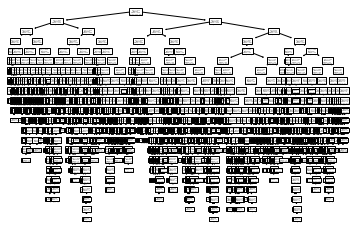

In [70]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree1 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 100, 
    splitter = "best", random_state = 123)
tree1.fit(X_train, y_train)
scores1 = cross_val_score(tree1, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores1)
print(scores1.mean())

tree.plot_tree(tree1)
tree.export_graphviz(decision_tree = tree1, class_names = True,out_file = "DTClassifier-max_depth100.dot")

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.971366076754822

[0.96917723 0.97228436 0.97091723 0.97290242 0.97252952]
0.9715621534164878


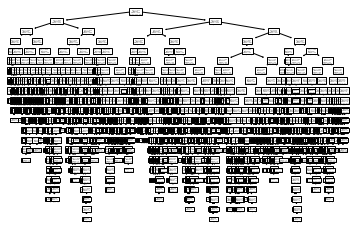

In [71]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree2 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 200, 
    splitter = "best", random_state = 123)
tree2.fit(X_train, y_train)
scores2 = cross_val_score(tree2, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores2)
print(scores2.mean())

tree.plot_tree(tree2)
tree.export_graphviz(decision_tree = tree2, class_names = True,out_file = "DTClassifier-max_depth200.dot")

[0.96917723 0.97228436 0.97091723 0.97290242 0.97252952]
0.9715621534164878


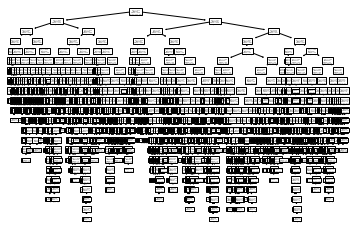

In [72]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree3 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 300, 
    splitter = "best", random_state = 123)
tree3.fit(X_train, y_train)
scores3 = cross_val_score(tree3, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores3)
print(scores3.mean())

tree.plot_tree(tree3)
tree.export_graphviz(decision_tree = tree3, class_names = True,out_file = "DTClassifier-max_depth300.dot")

[0.96917723 0.97228436 0.97091723 0.97290242 0.97252952]
0.9715621534164878


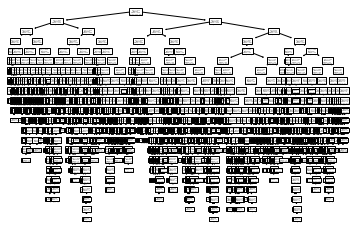

In [73]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree4 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 400, 
    splitter = "best", random_state = 123)
tree4.fit(X_train, y_train)
scores4 = cross_val_score(tree4, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores4)
print(scores4.mean())

tree.plot_tree(tree4)
tree.export_graphviz(decision_tree = tree4, class_names = True,out_file = "DTClassifier-max_depth400.dot")

[0.96917723 0.97228436 0.97091723 0.97290242 0.97252952]
0.9715621534164878


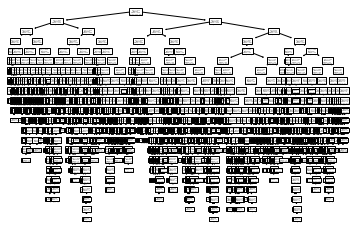

In [74]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree5 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 500, 
    splitter = "best", random_state = 123)
tree5.fit(X_train, y_train)
scores5 = cross_val_score(tree5, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores5)
print(scores5.mean())

tree.plot_tree(tree5)
tree.export_graphviz(decision_tree = tree5, class_names = True,out_file = "DTClassifier-max_depth500.dot")

[0.96917723 0.97228436 0.97091723 0.97290242 0.97252952]
0.9715621534164878


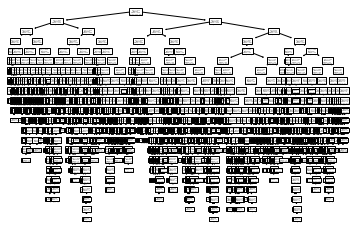

In [75]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree6 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 600, 
    splitter = "best", random_state = 123)
tree6.fit(X_train, y_train)
scores6 = cross_val_score(tree6, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores6)
print(scores6.mean())

tree.plot_tree(tree6)
tree.export_graphviz(decision_tree = tree6, class_names = True,out_file = "DTClassifier-max_depth600.dot")

[0.96917723 0.97228436 0.97091723 0.97290242 0.97252952]
0.9715621534164878


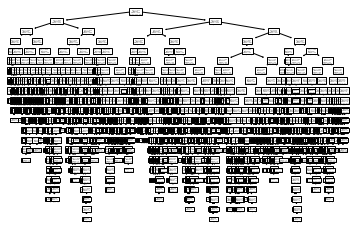

In [76]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree7 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 700, 
    splitter = "best", random_state = 123)
tree7.fit(X_train, y_train)
scores7 = cross_val_score(tree7, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores7)
print(scores7.mean())

tree.plot_tree(tree7)
tree.export_graphviz(decision_tree = tree7, class_names = True,out_file = "DTClassifier-max_depth700.dot")

[0.96917723 0.97228436 0.97091723 0.97290242 0.97252952]
0.9715621534164878


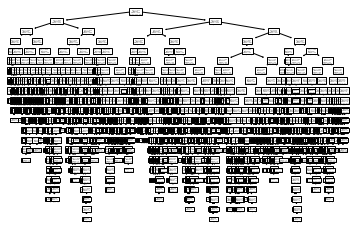

In [77]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree8 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 800, 
    splitter = "best", random_state = 123)
tree8.fit(X_train, y_train)
scores8 = cross_val_score(tree8, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores8)
print(scores8.mean())

tree.plot_tree(tree8)
tree.export_graphviz(decision_tree = tree8, class_names = True,out_file = "DTClassifier-max_depth800.dot")

[0.96917723 0.97228436 0.97091723 0.97290242 0.97252952]
0.9715621534164878


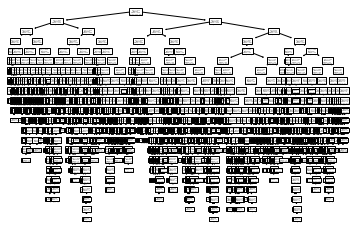

In [78]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree9 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 900, 
    splitter = "best", random_state = 123)
tree9.fit(X_train, y_train)
scores9 = cross_val_score(tree9, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores9)
print(scores9.mean())

tree.plot_tree(tree9)
tree.export_graphviz(decision_tree = tree9, class_names = True,out_file = "DTClassifier-max_depth900.dot")

[0.96917723 0.97228436 0.97091723 0.97290242 0.97252952]
0.9715621534164878


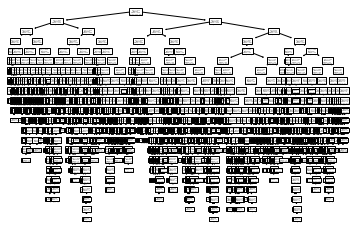

In [79]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

tree10 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 1000, 
    splitter = "best", random_state = 123)
tree10.fit(X_train, y_train)
scores10 = cross_val_score(tree10, X_train, y_train, cv = 5, scoring = 'accuracy')
print(scores10)
print(scores10.mean())

tree.plot_tree(tree10)
tree.export_graphviz(decision_tree = tree10, class_names = True,out_file = "DTClassifier-max_depth1000.dot")

# On the test set:

In [87]:
X_test = full_pipeline.transform(test_data)
X_test

array([[-0.22119851, -0.82075484, -0.64810635, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.38307558,  1.54936329, -0.64810635, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.58093853, -0.03071546,  1.04895948, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.11569656,  0.75932391,  1.04895948, ...,  0.        ,
         1.        ,  0.        ],
       [-0.75595654, -0.82075484, -0.64810635, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.31355952, -0.82075484, -0.64810635, ...,  1.        ,
         0.        ,  0.        ]])

In [89]:
y_pred1 = tree1.predict(X_test)  
y_pred1

array([2, 1, 1, ..., 1, 1, 1])

In [90]:
y_pred2 = tree2.predict(X_test)  
y_pred2

array([2, 1, 1, ..., 1, 1, 1])

In [91]:
y_pred3 = tree3.predict(X_test)  
y_pred3

array([2, 1, 1, ..., 1, 1, 1])

In [92]:
y_pred4 = tree4.predict(X_test)  
y_pred4

array([2, 1, 1, ..., 1, 1, 1])

In [93]:
y_pred5 = tree5.predict(X_test)  
y_pred5

array([2, 1, 1, ..., 1, 1, 1])

In [94]:
y_pred6 = tree6.predict(X_test)  
y_pred6

array([2, 1, 1, ..., 1, 1, 1])

In [95]:
y_pred7 = tree7.predict(X_test)  
y_pred7

array([2, 1, 1, ..., 1, 1, 1])

In [96]:
y_pred8 = tree8.predict(X_test)  
y_pred8

array([2, 1, 1, ..., 1, 1, 1])

In [97]:
y_pred9 = tree9.predict(X_test)  
y_pred9

array([2, 1, 1, ..., 1, 1, 1])

In [98]:
y_pred10 = tree10.predict(X_test)  
y_pred10

array([2, 1, 1, ..., 1, 1, 1])

In [99]:
y_test = test_data["winner"]

# Results

In [101]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred1
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.028633923245177967


In [102]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred2
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.028633923245177967


In [103]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred3
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.028633923245177967


In [104]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred4
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.028633923245177967


In [105]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred5
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.028633923245177967


In [106]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred6
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.028633923245177967


In [107]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred7
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.028633923245177967


In [108]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred8
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.028633923245177967


In [109]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred9
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.028633923245177967


In [110]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(
        y_true  = y_test,
        y_pred  = y_pred10
       )
print(f"Mean Absolute Error for model1: {mae}")

Mean Absolute Error for model1: 0.028633923245177967


In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.971366076754822

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.971366076754822

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3)

0.971366076754822

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred4)

0.971366076754822

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred5)

0.971366076754822

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred6)

0.971366076754822

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred7)

0.971366076754822

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred8)

0.971366076754822

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred9)

0.971366076754822

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred10)

0.971366076754822

# Summary

In [122]:
#Accuracy 

from tabulate import tabulate
mydata = [
    ['Tree', 'Accuracy'],
      ['tree1', accuracy_score(y_test, y_pred1)],
      ['tree2', accuracy_score(y_test, y_pred2)],
      ['tree3', accuracy_score(y_test, y_pred3)],
      ['tree4', accuracy_score(y_test, y_pred4)],
      ['tree5', accuracy_score(y_test, y_pred5)],
      ['tree6', accuracy_score(y_test, y_pred6)],
      ['tree7', accuracy_score(y_test, y_pred7)],
      ['tree8', accuracy_score(y_test, y_pred8)],
      ['tree9', accuracy_score(y_test, y_pred9)],
      ['tree10', accuracy_score(y_test, y_pred10)],
]
print(tabulate(mydata, tablefmt="grid"))

+--------+-------------------+
| Tree   | Accuracy          |
+--------+-------------------+
| tree1  | 0.971366076754822 |
+--------+-------------------+
| tree2  | 0.971366076754822 |
+--------+-------------------+
| tree3  | 0.971366076754822 |
+--------+-------------------+
| tree4  | 0.971366076754822 |
+--------+-------------------+
| tree5  | 0.971366076754822 |
+--------+-------------------+
| tree6  | 0.971366076754822 |
+--------+-------------------+
| tree7  | 0.971366076754822 |
+--------+-------------------+
| tree8  | 0.971366076754822 |
+--------+-------------------+
| tree9  | 0.971366076754822 |
+--------+-------------------+
| tree10 | 0.971366076754822 |
+--------+-------------------+
